<a href="https://colab.research.google.com/github/robertostl/Reinforcement-learning/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CREATE ENVIROMENT
import gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

demand=demand2E
dicactions1={0:725,1:750,2:775,3:800,4:825,5:850,6:875,7:900,8:925,9:950,10:975}
dicactions2={0:350,1:360,2:370,3:380,4:390,5:400,6:410,7:420,8:430,9:440,10:450}
dicactions3={0:340,1:350,2:360,3:370,4:375,5:380,6:390,7:400,8:405,9:410,10:420}
dicactions=dicactions2
#def demand(action):
    #return max(4-1*(action),0)#+round(2*np.random.normal()),0)
    
n_piezas=800  #numero de piezas en stock
n_periodos=12 #numero de meses para vender las piezas

class Env():
    def __init__(self):
        self.size = n_piezas+1;
        self.periods=n_periodos 
        self.posX = [n_piezas,n_periodos];
        self.endX = 0;
        self.actions = [0,1,2,3,4,5,6,7,8,9,10];
        self.stateCount = self.size;
        self.actionCount = len(self.actions);

    def reset(self):
        self.posX = [n_piezas,n_periodos];
        self.done = False;
        return [n_piezas,n_periodos],0, False;

    # take action
    def step(self, action):
        nextState = [max(self.posX[0]-int(demand(dicactions[action])),0),self.posX[1]-1];
       
        done = (nextState[1]==self.endX or nextState[0]==self.endX);
        
        reward = (dicactions[action])*(self.posX[0]-nextState[0])-2*self.posX[0];
        
        return nextState, reward, done;

    # return a random action
    def randomAction(self):
        return np.random.choice(self.actions);
    
    def policyFunction(self,qtable,epsilon): 
        Action_probabilities = np.ones(self.actionCount, dtype = float) * epsilon / self.actionCount 
        best_action = np.argmax(qtable[self.posX[1]][self.posX[0]]) 
        Action_probabilities[best_action] += (1.0 - epsilon) 
        return Action_probabilities

In [ ]:
81*925+24*975-5*(105+96+87+78+69+60+51+42+33+24+16+8)

94980

In [ ]:
demand(390)

65.21928966812753

**BASIC Q LEARNING**

In [ ]:
# create environment
env = Env()
qtable = np.zeros([n_periodos+1,env.stateCount, env.actionCount]).tolist()

# hyperparameters
epochs = 20000
#gamma = 0.1
epsilon = 0.8
lr=1
decay = epsilon/epochs
#stats
episode_lengths=[0]*epochs
episode_rewards=[0]*epochs
# training loop
for i in range(epochs):
    state, reward, done = env.reset()
    steps=0
    while not done:
        #os.system('clear')
        
        
        
        # count steps to finish game
        steps+= 1
        action_probabilities = env.policyFunction(qtable,epsilon)
        action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
        
        # take action
        next_state, reward, done = env.step(action)
        env.posX=next_state
        
        # Update statistics 
        episode_rewards[i] += reward 
        
        # update qtable value with Bellman equation
        qtable[state[1]][state[0]][action] = (1-lr)* qtable[state[1]][state[0]][action]+lr*(reward +  max(qtable[state[1]-1][next_state[0]]))#*gamma

        # update state
        state = next_state
        # The more we learn, the less we take random actions
        epsilon = epsilon-decay*epsilon
    episode_lengths[i] = steps
    #print("epoch #", i+1, "/", epochs)
    #print("\nDone in", steps, "steps".format(steps))
print(episode_rewards[epochs-1])

289354


289354


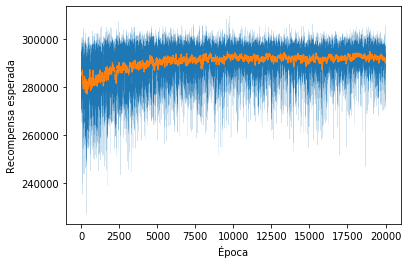

In [ ]:
#dibujo de las recompensas
plt.plot(episode_rewards, linewidth=0.1)
df=pd.DataFrame(episode_rewards)
df['MA'] = df.rolling(window=50).mean() 
plt.plot(df['MA'], linewidth=1.1)
plt.ylabel('Recompensa esperada')
plt.xlabel('Época')
print(episode_rewards[epochs-1])
#print(max(qtable[12][250]))
Qrew=df['MA']

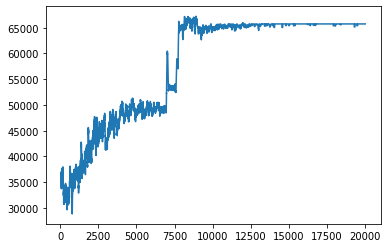

In [ ]:
profit=[0]*100
for i in range(100):
  state, reward, done = env.reset()
  steps=0
  step_reward=[0.0]*13
  actions=[0]*13
  R=0
  while not done:
        # count steps to finish game
          steps+= 1
          action_probabilities = env.policyFunction(qtable,0)
          action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
          actions[steps]=action
          # take action
          next_state, reward, done = env.step(action)
          env.posX=next_state
        
          # Update statistics 
          step_reward[steps] = reward 
          R=R+reward
          # update state
          state = next_state 
  profit[i]=R
  #episode_length = steps
  #print("\nDone in", steps, "steps".format(steps))
  #print(step_reward)
  #a=dicactions.values()
  #b=list(a)
  print(actions)
print(profit)

sum=0
for i in range(100):
  sum=sum+profit[i]
mean=sum/100
dt=0
for i in range(100):
  dt=(mean-profit[i])**2+dt
dtf=np.sqrt(dt/100)
print(mean)
print(dtf)

[0, 6, 2, 4, 4, 7, 5, 1, 1, 1, 10, 4, 4]
[0, 6, 2, 3, 6, 6, 5, 7, 0, 4, 4, 2, 0]
[0, 6, 8, 5, 10, 1, 2, 0, 5, 2, 6, 1, 0]
[0, 6, 0, 4, 9, 4, 2, 1, 10, 0, 0, 5, 7]
[0, 6, 5, 9, 2, 4, 4, 0, 6, 6, 2, 2, 2]
[0, 6, 4, 1, 1, 8, 1, 2, 7, 0, 9, 1, 6]
[0, 6, 1, 10, 2, 0, 7, 7, 1, 0, 0, 6, 0]
[0, 6, 3, 3, 9, 1, 1, 5, 2, 1, 1, 1, 10]
[0, 6, 0, 7, 2, 7, 0, 7, 7, 1, 3, 8, 4]
[0, 6, 4, 3, 4, 3, 9, 1, 0, 1, 0, 1, 0]
[0, 6, 5, 1, 1, 1, 1, 10, 9, 0, 9, 0, 1]
[0, 6, 2, 5, 3, 6, 5, 1, 3, 0, 6, 2, 2]
[0, 6, 10, 5, 2, 0, 2, 2, 9, 1, 1, 6, 0]
[0, 6, 3, 7, 8, 4, 7, 2, 1, 3, 2, 9, 0]
[0, 6, 1, 6, 4, 5, 2, 3, 0, 7, 0, 2, 2]
[0, 6, 2, 7, 4, 3, 3, 5, 1, 4, 0, 2, 6]
[0, 6, 0, 10, 2, 0, 5, 6, 2, 8, 6, 1, 1]
[0, 6, 2, 9, 1, 4, 8, 10, 3, 7, 7, 1, 2]
[0, 6, 4, 6, 4, 0, 0, 3, 0, 1, 9, 1, 0]
[0, 6, 2, 10, 3, 6, 5, 5, 4, 3, 4, 1, 1]
[0, 6, 0, 10, 4, 7, 2, 1, 9, 0, 10, 0, 0]
[0, 6, 5, 3, 4, 2, 1, 5, 3, 0, 0, 0, 1]
[0, 6, 8, 2, 4, 3, 0, 10, 10, 0, 0, 2, 2]
[0, 6, 7, 1, 1, 3, 3, 6, 9, 0, 0, 4, 3]
[0, 6, 8, 1, 3, 2, 5, 0, 0

In [ ]:
state, reward, done = env.reset()
steps=0
step_reward=[0.0]*13
actions=[0]*13
demands=[0]*13
R=0
while not done:
  # count steps to finish game
  steps+= 1
  action_probabilities = env.policyFunction(qtable,0)
  action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
  actions[steps]=action
  # take action
  next_state, reward, done = env.step(action)
  env.posX=next_state
  # Update statistics 
  step_reward[steps] = reward 
  R=R+reward
  demands[steps]=-state[0]+next_state[0]          
  # update state
  state = next_state
       
profit[i]=R
  #episode_length = steps
  #print("\nDone in", steps, "steps".format(steps))
  #print(step_reward)
  #a=dicactions.values()
  #b=list(a)
print(actions)
print(demands)
print(R)

[0, 6, 2, 5, 10, 4, 4, 6, 0, 0, 2, 0, 3]
[0, -67, -87, -59, -38, -64, -43, -63, -99, -87, -63, -84, -46]
292670


In [ ]:
int(demand2(390))

65

**SARSA**

In [ ]:
import gym
import numpy as np
import time, pickle, os

env = Env()
epsilon = 0.8
#min_epsilon = 0.001
#max_epsilon = 0.8
total_episodes = 25000
decay = epsilon/total_episodes

lr_rate = 0.5
gamma = 1#0.96
Q = np.zeros((13,env.stateCount, env.actionCount))
episode_rewards=[0]*total_episodes
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.randomAction()
    else:
        action = np.argmax(Q[state[1],state[0], :])
    return action

def learn(state, state2, reward, action, action2):
    predict = Q[state[1],state[0], action]
    target = reward + gamma * Q[state2[1],state2[0], action2]
    Q[state[1],state[0], action] = Q[state[1],state[0], action] + lr_rate * (target-predict)
    return Q

# Start
rewards=0

for episode in range(total_episodes):
    t = 0
    state,reward,done =env.reset()
    #choose action 
    action_probabilities = env.policyFunction(Q,epsilon)
    action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
    
    while not done:
        nextstate, reward, done = env.step(action)
        env.posX=nextstate
        action2_probabilities = env.policyFunction(Q,epsilon)
        action2 = np.random.choice(np.arange(len(action2_probabilities)), p = action2_probabilities)
        learn(state, nextstate, reward, action, action2)
        state = nextstate
        action = action2
        t += 1
        rewards+=1
        episode_rewards[episode] += reward
#epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode) 
        epsilon=epsilon-decay*epsilon
    
print ("Número de pasos: ", rewards/total_episodes)
print(Q)


IndexError: ignored

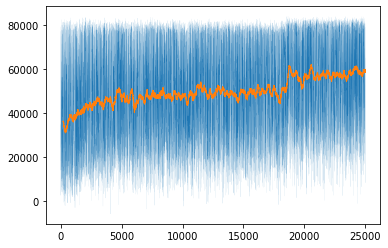

In [ ]:
#dibujo de las recompensas
plt.plot(episode_rewards, linewidth=0.05)
df=pd.DataFrame(episode_rewards)
df['MA'] = df.rolling(window=200).mean() 
plt.plot(df['MA'], linewidth=1)
#print(episode_rewards[39999])
#max(Q[12][800])
SARSArew=df['MA']

In [ ]:
state, reward, done = env.reset()
steps=0
step_reward=[0]*13
actions=[0]*13
while not done:
       # count steps to finish game
        steps+= 1
        action_probabilities = env.policyFunction(Q,0)
        action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
        actions[steps]=action
        # take action
        next_state, reward, done = env.step(action)
        env.posX=next_state
        
        # Update statistics 
        step_reward[steps] = reward 
        # update state
        state = next_state
episode_length = steps

print("\nDone in", steps, "steps".format(steps))
print(step_reward)
a=dicactions.values()
b=list(a)
print(actions)
#print(sum(step_reward))
profit=[0]*100
for i in range(100):
  state, reward, done = env.reset()
  steps=0
  step_reward=[0.0]*13
  actions=[0]*13
  R=0
  while not done:
        # count steps to finish game
          steps+= 1
          action_probabilities = env.policyFunction(Q,0)
          action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
          actions[steps]=action
          # take action
          next_state, reward, done = env.step(action)
          env.posX=next_state
        
          # Update statistics 
          step_reward[steps] = reward 
          R=R+reward
          # update state
          state = next_state 
  profit[i]=R
  #episode_length = steps
  #print("\nDone in", steps, "steps".format(steps))
  #print(step_reward)
  #a=dicactions.values()
  #b=list(a)
  print(actions)
print(profit)

sum=0
for i in range(100):
  sum=sum+profit[i]
mean=sum/100
dt=0
for i in range(100):
  dt=(mean-profit[i])**2+dt
dtf=np.sqrt(dt/100)
print(mean)
print(dtf)


Done in 12 steps
[0, 16430, 410, 1080, 10955, 1030, 4325, 3640, 3460, 6240, 755, 8915, -315]
[0, 0, 1, 9, 0, 2, 6, 2, 0, 0, 8, 2, 0]
[0, 0, 0, 0, 2, 0, 7, 0, 2, 0, 2, 3, 0]
[0, 0, 0, 0, 1, 0, 6, 7, 1, 0, 1, 2, 0]
[0, 0, 8, 6, 0, 0, 1, 5, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 8, 9, 0, 0, 0, 7, 0]
[0, 0, 8, 8, 4, 0, 0, 5, 0, 7, 8, 0, 0]
[0, 0, 2, 0, 3, 7, 5, 5, 2, 1, 0, 4, 1]
[0, 0, 0, 0, 0, 5, 4, 0, 0, 0, 0, 0, 0]
[0, 0, 9, 8, 1, 1, 10, 0, 6, 0, 0, 1, 0]
[0, 0, 1, 1, 0, 0, 1, 6, 0, 8, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 3, 0, 0, 9, 5, 0, 0]
[0, 0, 6, 6, 4, 1, 7, 5, 10, 8, 2, 0, 0]
[0, 0, 0, 5, 0, 0, 3, 1, 0, 0, 4, 0, 4]
[0, 0, 4, 6, 5, 2, 5, 0, 0, 1, 2, 0, 0]
[0, 0, 0, 0, 2, 2, 0, 6, 10, 0, 0, 6, 2]
[0, 0, 2, 3, 0, 1, 5, 7, 1, 6, 0, 0, 0]
[0, 0, 1, 6, 6, 5, 5, 6, 0, 0, 6, 1, 10]
[0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 1, 0, 10]
[0, 0, 8, 0, 6, 0, 1, 0, 7, 0, 0, 7, 1]
[0, 0, 0, 8, 2, 4, 5, 5, 3, 1, 1, 0, 3]
[0, 0, 2, 0, 1, 3, 1, 9, 0, 0, 0, 2, 0]
[0, 0, 0, 9, 8, 3, 0,

DOUBLE Q-**LEARNING**

In [ ]:
# create environment
env = Env()
qtable1 = np.zeros([n_periodos+1,env.stateCount, env.actionCount]).tolist()
qtable2 = np.zeros([n_periodos+1,env.stateCount, env.actionCount]).tolist()

# hyperparameters
epochs = 40000
gamma = 1
epsilon = 0.8
decay = epsilon/epochs
alpha=1
#stats
episode_lengths=[0]*epochs
episode_rewards=[0]*epochs
# training loop
for i in range(epochs):
    state, reward, done = env.reset()
    steps=0
    while not done:
        steps+= 1
        action_probabilities = env.policyFunction(qtable1+qtable2,epsilon)
        action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
        # take action
        next_state, reward, done = env.step(action)
        env.posX=next_state
        # Update statistics 
        episode_rewards[i] += reward
        # update qtable value with Bellman equation
        num_ale=np.random.rand()
        if(num_ale<0.5):
		        qtable1[state[1]][state[0]][action] += alpha*(reward +  qtable2[state[1]-1][next_state[0]][np.argmax(qtable1[state[1]-1][nextstate[0]])]-qtable1[state[1]][state[0]][action])#*gamma
        else:
            qtable2[state[1]][state[0]][action] += alpha*(reward +  qtable1[state[1]-1][next_state[0]][np.argmax(qtable2[state[1]-1][nextstate[0]])]-qtable2[state[1]][state[0]][action])#*gamma
        # update state
        state = next_state
    # The more we learn, the less we take random actions
        epsilon = epsilon-decay*epsilon
        episode_lengths[i] = steps
    print("epoch #", i+1, "/", epochs)
    print("\nDone in", steps, "steps".format(steps))

#dibujo de los steps
#plt.plot(episode_lengths, linewidth=0.1)
#df1=pd.DataFrame(episode_lengths)
#plt.plot(df1.rolling(window=50).mean() )
#episode_lengths[9999]


epoch # 1 / 40000

Done in 12 steps
epoch # 2 / 40000

Done in 12 steps
epoch # 3 / 40000

Done in 12 steps
epoch # 4 / 40000

Done in 12 steps
epoch # 5 / 40000

Done in 12 steps
epoch # 6 / 40000

Done in 6 steps
epoch # 7 / 40000

Done in 12 steps
epoch # 8 / 40000

Done in 12 steps
epoch # 9 / 40000

Done in 12 steps
epoch # 10 / 40000

Done in 12 steps
epoch # 11 / 40000

Done in 12 steps
epoch # 12 / 40000

Done in 12 steps
epoch # 13 / 40000

Done in 12 steps
epoch # 14 / 40000

Done in 12 steps
epoch # 15 / 40000

Done in 12 steps
epoch # 16 / 40000

Done in 12 steps
epoch # 17 / 40000

Done in 12 steps
epoch # 18 / 40000

Done in 12 steps
epoch # 19 / 40000

Done in 12 steps
epoch # 20 / 40000

Done in 12 steps
epoch # 21 / 40000

Done in 12 steps
epoch # 22 / 40000

Done in 12 steps
epoch # 23 / 40000

Done in 12 steps
epoch # 24 / 40000

Done in 12 steps
epoch # 25 / 40000

Done in 12 steps
epoch # 26 / 40000

Done in 11 steps
epoch # 27 / 40000

Done in 12 steps
epoch # 28 

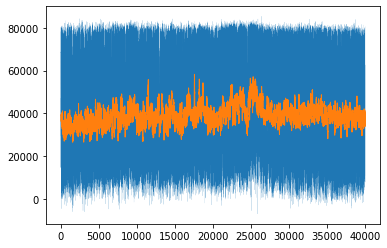

In [ ]:
#dibujo de las recompensas
plt.plot(episode_rewards, linewidth=0.1)
df=pd.DataFrame(episode_rewards)
df['MA'] = df.rolling(window=50).mean() 
plt.plot(df['MA'], linewidth=1)
#episode_rewards[19999]
#max(qtable[12][800])
DQrew=df['MA']

In [ ]:
state, reward, done = env.reset()
steps=0
step_reward=[0]*13
actions=[0]*13
while not done:
       # count steps to finish game
        steps+= 1
        action_probabilities = env.policyFunction(qtable1+qtable2,0)
        action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
        actions[steps]=action
        # take action
        next_state, reward, done = env.step(action)
        env.posX=next_state
        
        # Update statistics 
        step_reward[steps] = reward 
        # update state
        state = next_state
episode_length = steps

print("\nDone in", steps, "steps".format(steps))
print(step_reward)
a=dicactions.values()
b=list(a)
print(actions)
print(b)
#print(sum(step_reward))
profit=[0]*100
for i in range(100):
  state, reward, done = env.reset()
  steps=0
  step_reward=[0.0]*13
  actions=[0]*13
  R=0
  while not done:
        # count steps to finish game
          steps+= 1
          action_probabilities = env.policyFunction(qtable1+qtable2,0)
          action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
          actions[steps]=action
          # take action
          next_state, reward, done = env.step(action)
          env.posX=next_state
        
          # Update statistics 
          step_reward[steps] = reward 
          R=R+reward
          # update state
          state = next_state 
  profit[i]=R
  #episode_length = steps
  #print("\nDone in", steps, "steps".format(steps))
  #print(step_reward)
  #a=dicactions.values()
  #b=list(a)
  print(actions)
print(profit)

sum=0
for i in range(100):
  sum=sum+profit[i]
mean=sum/100
dt=0
for i in range(100):
  dt=(mean-profit[i])**2+dt
dtf=np.sqrt(dt/100)
print(mean)
print(dtf)


Done in 12 steps
[0, 1585, -415, 645, -340, 1170, 710, 11135, 4520, 8005, 725, 11845, 850]
[0, 8, 7, 3, 10, 6, 3, 1, 10, 3, 3, 0, 1]
[340, 350, 360, 370, 375, 380, 390, 400, 405, 410, 420]
[0, 8, 10, 8, 10, 2, 0, 5, 2, 6, 6, 6, 0]
[0, 8, 0, 7, 9, 1, 0, 0, 9, 3, 1, 0, 0]
[0, 8, 10, 1, 8, 10, 6, 0, 0, 4, 5, 3, 0]
[0, 8, 0, 3, 0, 0, 10, 1, 0, 4, 8, 9, 1]
[0, 8, 8, 1, 1, 8, 3, 1, 7, 6, 2, 4, 0]
[0, 8, 2, 10, 1, 10, 9, 10, 3, 1, 0, 4, 1]
[0, 8, 3, 3, 0, 4, 5, 0, 1, 0, 10, 0, 0]
[0, 8, 8, 0, 0, 0, 0, 1, 8, 0, 10, 4, 3]
[0, 8, 10, 3, 0, 4, 2, 10, 4, 6, 5, 3, 0]
[0, 8, 10, 2, 0, 5, 9, 3, 0, 3, 2, 2, 2]
[0, 8, 0, 2, 0, 3, 0, 2, 0, 0, 0, 2, 0]
[0, 8, 4, 5, 0, 6, 10, 3, 0, 6, 10, 10, 0]
[0, 8, 8, 5, 0, 10, 8, 9, 0, 10, 2, 3, 2]
[0, 8, 10, 8, 1, 10, 0, 5, 0, 3, 3, 0, 3]
[0, 8, 0, 4, 0, 1, 0, 2, 0, 0, 0, 0, 0]
[0, 8, 10, 1, 0, 10, 0, 0, 6, 2, 9, 0, 0]
[0, 8, 10, 5, 9, 3, 1, 6, 2, 6, 6, 8, 0]
[0, 8, 8, 6, 9, 0, 1, 2, 10, 2, 1, 0, 0]
[0, 8, 10, 1, 0, 4, 0, 10, 0, 3, 2, 1, 0]
[0, 8, 8, 1, 0, 2, 6, 3,

**EXPECTED SARSA**

NÃºmero de pasos:  11.948657142857142


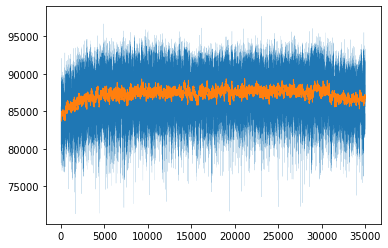

In [ ]:
import gym
import numpy as np
import time, pickle, os

env = Env()
epsilon = 0.8
#min_epsilon = 0.001
#max_epsilon = 0.8

total_episodes = 35000
decay_rate =epsilon/total_episodes
#max_steps = 12
lr_rate = 0.5#0.81
gamma = 1#0.96
Qe = np.zeros((13,env.stateCount, env.actionCount))
episode_rewards=[0]*total_episodes
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.randomAction()
    else:
        action = np.argmax(Qe[state[1],state[0], :])
    return action
#la estimación de los valores tiene en cuenta todas las posibles opciones a la hora de elegir action2 
def learn(state, state2, reward, action, action2):
    predict = Qe[state[1],state[0], action]
    Q_esp=0
    for i in range(env.actionCount):
        Q_esp = Q_esp + Qe[state2[1],state2[0], i] * action2_probabilities[i]
        target = reward +  Q_esp
        
    Qe[state[1],state[0], action] = Qe[state[1],state[0], action] + lr_rate * (target-predict)
    return Qe

# Start
rewards=0

for episode in range(total_episodes):
    t = 0
    state,reward,done =env.reset()
    #choose action 
    action_probabilities = env.policyFunction(Qe,epsilon)
    action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities)
    while not done:
        
        nextstate, reward, done = env.step(action)
        env.posX=nextstate
        action2_probabilities = env.policyFunction(Qe,epsilon)
        action2 = np.random.choice(np.arange(len(action2_probabilities)), p = action2_probabilities)
        learn(state, nextstate, reward, action, action2)
        state = nextstate
        action = action2
        t += 1
        rewards+=1
        episode_rewards[episode] += reward
        #epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode) 
        epsilon=epsilon-decay_rate*epsilon
    
print ("NÃºmero de pasos: ", rewards/total_episodes)
#print(Q)

#dibujo de las recompensas
plt.plot(episode_rewards, linewidth=0.1)
df=pd.DataFrame(episode_rewards)
df['MA'] = df.rolling(window=50).mean() 
plt.plot(df['MA'], linewidth=1)
episode_rewards[9999]
max(Qe[12][105])
ESARSArew=df['MA']

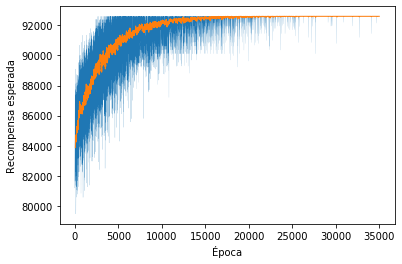

In [ ]:
#dibujo de las recompensas
plt.plot(episode_rewards, linewidth=0.1)
df=pd.DataFrame(episode_rewards)
df['MA'] = df.rolling(window=50).mean()
plt.xlabel('Época')
plt.ylabel('Recompensa esperada')
plt.plot(df['MA'], linewidth=1)
ESARSArew=df['MA']

In [ ]:
state, reward, done = env.reset()
steps=0
step_reward=[0]*13
actions=[0]*13
while not done:
       # count steps to finish game
        steps+= 1
        action_probabilities = env.policyFunction(Qe,0)
        action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
        actions[steps]=action
        # take action
        next_state, reward, done = env.step(action)
        env.posX=next_state
        
        # Update statistics 
        step_reward[steps] = reward 
        # update state
        state = next_state
episode_length = steps

print("\nDone in", steps, "steps".format(steps))
#print(episode_rewards[39999])
print(step_reward)
a=dicactions.values()
b=list(a)
print(actions)
#print(sum(step_reward))
profit=[0]*100
for i in range(100):
  state, reward, done = env.reset()
  steps=0
  step_reward=[0.0]*13
  actions=[0]*13
  R=0
  while not done:
        # count steps to finish game
          steps+= 1
          action_probabilities = env.policyFunction(Qe,0)
          action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
          actions[steps]=action
          # take action
          next_state, reward, done = env.step(action)
          env.posX=next_state
        
          # Update statistics 
          step_reward[steps] = reward 
          R=R+reward
          # update state
          state = next_state 
  profit[i]=R
  #episode_length = steps
  #print("\nDone in", steps, "steps".format(steps))
  #print(step_reward)
  #a=dicactions.values()
  #b=list(a)
  print(actions)
print(profit)

sum=0
for i in range(100):
  sum=sum+profit[i]
mean=sum/100
dt=0
for i in range(100):
  dt=(mean-profit[i])**2+dt
dtf=np.sqrt(dt/100)
print(mean)
print(dtf)


Done in 12 steps
[0, 7975, 6500, 7895, 4490, 8440, 9595, 8250, 8800, 6825, 8670, 7540, 3580]
[0, 5, 2, 8, 10, 3, 7, 5, 7, 2, 10, 9, 7]
[0, 5, 0, 8, 5, 9, 7, 10, 8, 10, 7, 7, 7]
[0, 5, 4, 9, 1, 3, 1, 5, 4, 4, 10, 7, 6]
[0, 5, 2, 8, 3, 9, 6, 5, 10, 7, 0, 6, 2]
[0, 5, 0, 3, 10, 10, 10, 6, 8, 10, 10, 10, 7]
[0, 5, 0, 8, 3, 4, 5, 4, 6, 10, 10, 9, 7]
[0, 5, 9, 6, 3, 9, 7, 4, 8, 7, 7, 8, 7]
[0, 5, 4, 3, 3, 7, 2, 5, 7, 4, 10, 6, 2]
[0, 5, 4, 1, 3, 3, 7, 5, 4, 7, 7, 6, 3]
[0, 5, 2, 6, 6, 9, 7, 7, 4, 4, 7, 7, 1]
[0, 5, 4, 8, 3, 6, 10, 4, 7, 10, 6, 9, 6]
[0, 5, 4, 6, 3, 4, 5, 7, 4, 5, 0, 6, 2]
[0, 5, 0, 1, 3, 6, 7, 5, 8, 10, 7, 6, 2]
[0, 5, 2, 1, 10, 7, 5, 3, 4, 7, 0, 8, 3]
[0, 5, 4, 8, 10, 9, 7, 4, 8, 5, 7, 7, 3]
[0, 5, 0, 8, 10, 2, 5, 7, 4, 4, 6, 10, 10]
[0, 5, 9, 6, 6, 10, 7, 6, 7, 2, 10, 7, 10]
[0, 5, 2, 9, 5, 9, 7, 6, 10, 10, 10, 6, 7]
[0, 5, 0, 6, 10, 9, 7, 7, 4, 3, 7, 10, 0]
[0, 5, 1, 6, 1, 3, 2, 7, 1, 2, 7, 10, 3]
[0, 5, 0, 1, 3, 6, 7, 4, 10, 3, 10, 10, 7]
[0, 5, 0, 9, 1, 1, 2, 3, 10, 7,

**Q LAMBDA**

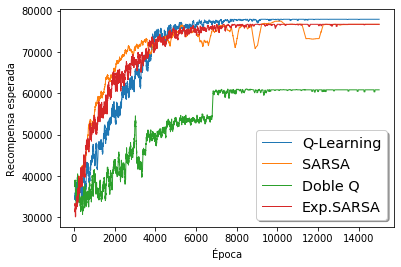

In [ ]:
plt.plot(Qrew,linewidth=1,label='Q-Learning')
plt.plot(SARSArew,linewidth=1,label='SARSA')
plt.plot(DQrew,linewidth=1,label='Doble Q')
plt.plot(ESARSArew,linewidth=1,label='Exp.SARSA')
plt.xlabel('Época')
plt.ylabel('Recompensa esperada')
plt.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
env = Env()
qtable = np.zeros([11,env.stateCount, env.actionCount]).tolist()
e=np.zeros([11,env.stateCount, env.actionCount]).tolist()
# hyperparameters
epochs = 10000
gamma = 0.1
epsilon = 0.8
decay = 0.0001
discount=0.1
learning_rate=0.1


stats_episode_rewards=[0]*epochs
# training loop
for i in range(epochs):
    state, reward, done = env.reset()
    steps=0
    while not done:
        #os.system('clear')
        print("epoch #", i+1, "/", epochs)
        #env.render()
        #time.sleep(0.05)

        # count steps to finish game
        steps+= 1

        action_probabilities = env.policyFunction(qtable,epsilon)
        action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 

        # take action
        next_state, reward, done = env.step(action)
        env.posX=next_state
        stats_episode_rewards[i] += reward
        
        # Select next action
        action_probabilities = env.policyFunction(qtable,epsilon)
        next_action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
        
        
        

        # update qtable value with Bellman equation
        # Get update value
        best_next_action = np.argmax(qtable[next_state[1]][next_state[0]])
        td_target = reward + discount * qtable[next_state[1]][next_state[0]][best_next_action]
        td_error = td_target - qtable[state[1]][state[0]][action]
        e[state[1]][state[0]][action] += 1
        # Update all states
        for s in range(15):
            for a in range(5):
                for t in range(10):
                    
                    # Update Q value based on eligibility trace
                    qtable[t][s][a] += learning_rate * td_error * e[t][s][a]
                    
                    # Decay eligibility trace if best action is taken
                    if next_action is best_next_action:
                        e[t][s][a] = discount * e[t][s][a]*_lambda
                     # Reset eligibility trace if random action taken
                    else:
                        e[t][s][a] = 0
        
        
        
        
        
       

        # update state
        state = next_state
    # The more we learn, the less we take random actions
        epsilon -= decay*epsilon

    print("\nDone in", steps, "steps".format(steps))
    #time.sleep(0.8)

epoch # 1 / 10000
epoch # 1 / 10000
epoch # 1 / 10000
epoch # 1 / 10000
epoch # 1 / 10000
epoch # 1 / 10000

Done in 6 steps
epoch # 2 / 10000
epoch # 2 / 10000
epoch # 2 / 10000
epoch # 2 / 10000

Done in 4 steps
epoch # 3 / 10000
epoch # 3 / 10000
epoch # 3 / 10000
epoch # 3 / 10000
epoch # 3 / 10000
epoch # 3 / 10000
epoch # 3 / 10000
epoch # 3 / 10000

Done in 8 steps
epoch # 4 / 10000
epoch # 4 / 10000
epoch # 4 / 10000
epoch # 4 / 10000
epoch # 4 / 10000
epoch # 4 / 10000
epoch # 4 / 10000
epoch # 4 / 10000

Done in 8 steps
epoch # 5 / 10000
epoch # 5 / 10000
epoch # 5 / 10000
epoch # 5 / 10000
epoch # 5 / 10000
epoch # 5 / 10000

Done in 6 steps
epoch # 6 / 10000
epoch # 6 / 10000
epoch # 6 / 10000
epoch # 6 / 10000
epoch # 6 / 10000
epoch # 6 / 10000
epoch # 6 / 10000

Done in 7 steps
epoch # 7 / 10000
epoch # 7 / 10000
epoch # 7 / 10000
epoch # 7 / 10000
epoch # 7 / 10000

Done in 5 steps
epoch # 8 / 10000
epoch # 8 / 10000
epoch # 8 / 10000
epoch # 8 / 10000

Done in 4 steps


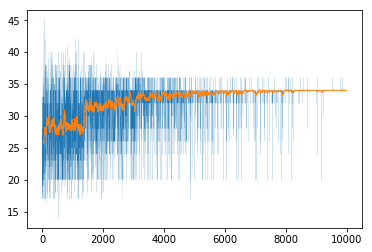

In [ ]:
plt.plot(stats_episode_rewards, linewidth=0.1)
df=pd.DataFrame(stats_episode_rewards)
df['MA'] = df.rolling(window=50).mean() 
plt.plot(df['MA'], linewidth=1)

**SARSA LAMBDA**

In [ ]:
env = Env()
qtable = np.zeros([11,env.stateCount, env.actionCount]).tolist()
e=np.zeros([11,env.stateCount, env.actionCount]).tolist()
# hyperparameters
epochs = 10000
gamma = 0.1
epsilon = 0.08
decay = 0.1
discount=0.1
learning_rate=0.1


stats_episode_rewards=[0]*epochs
# training loop
for i in range(epochs):
    state, reward, done = env.reset()
    steps=0
    while not done:
        #os.system('clear')
        print("epoch #", i+1, "/", epochs)
        #env.render()
        #time.sleep(0.05)

        # count steps to finish game
        steps+= 1

        action2_probabilities = env.policyFunction(Q,epsilon)
        action2 = np.random.choice(np.arange(len(action2_probabilities)), p = action2_probabilities)
        # take action
        next_state, reward, done = env.step(action)
        env.posX=next_state
        stats_episode_rewards[i] += reward
        # Select next action
        if np.random.uniform() < epsilon:
            next_action = env.randomAction()
        # if not select max action in Qtable (act greedy)
        else:
            if (max(qtable[next_state[1]][next_state[0]])==0): next_action = env.randomAction()
            else: next_action = qtable[next_state[1]][next_state[0]].index(max(qtable[next_state[1]][next_state[0]]))
        
        
        

        # update qtable value with Bellman equation
        # Get update value
        predict = Q[state[1],state[0], action]
        target = reward + gamma * Q[state2[1],state2[0], action2]
        Q[state[1],state[0], action] = Q[state[1],state[0], action] + lr_rate * (target - predict)
        
        best_next_action = np.argmax(qtable[next_state[1]][next_state[0]])
        td_target = reward + discount * qtable[next_state[1]][next_state[0]][best_next_action]
        td_error = td_target - qtable[state[1]][state[0]][action]
        e[state[1]][state[0]][action] += 1
        # Update all states
        for s in range(15):
            for a in range(5):
                for t in range(10):
                    
                    # Update Q value based on eligibility trace
                    qtable[t][s][a] += learning_rate * td_error * e[t][s][a]
                    
                    # Decay eligibility trace if best action is taken
                    if next_action is best_next_action:
                        e[t][s][a] = discount * e[t][s][a]*_lambda
                     # Reset eligibility trace if random action taken
                    else:
                        e[t][s][a] = 0
        
        
        
        
        
       

        # update state
        state = next_state
    # The more we learn, the less we take random actions
    #epsilon -= decay*epsilon

    print("\nDone in", steps, "steps".format(steps))
    #time.sleep(0.8)


epoch # 1 / 10000


NameError: ignored

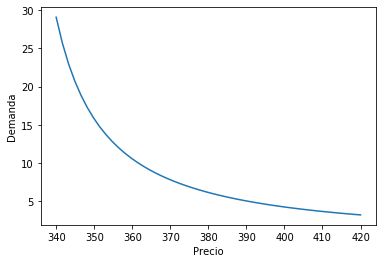

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
def demand1(x):
  return 18-0.01*x
def demand2(x):
  return 1000*np.exp(-0.007*x)
def demand3(x):
  return 750/((x-325)**(1.2))
def demand4(x):
  return 1000*np.exp(-0.05*(x))/(1+np.exp(-0.05*(x)))
def demand5(x):
  return 8*np.log(250-x)
x1=np.linspace(750,950)
x2=np.linspace(300,500)
x3=np.linspace(340,420)
x4=np.linspace(100,200)
x5=np.linspace(100,200)
plt.plot(x3,demand3(x3))
plt.xlabel('Precio')
plt.ylabel('Demanda')
#plt.plot(x2,demand2(x2))
#plt.axis([0, 6, 0, 20])
plt.show()
#plt.plot(x3,demand3(x3))
#plt.plot(x4,demand4(x4))
def demand1E(x):
  return 18-0.01*x +round(1.5*np.random.normal())
def demand2E(x):
  return 1000*np.exp(-0.007*x)*((np.random.normal()/8+1))
def demand3E(x):
  return 750*np.random.exponential(1)/((x-325)**(1.2))

In [ ]:

demand5(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


nan

**APRENDIZAJE MULTI**

In [ ]:
#CREATE ENVIROMENT
import gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

dicactions={0:725,1:775,2:825,3:875,4:925,5:975}
n_piezas=105  #numero de piezas en stock
n_periodos=12 #numero de meses para vender las piezas
R1 = np.array([range(10,16),range(9,15),range(8,14),range(7,13),range(6,12),range(5,11)])
R2 = np.array([range(10,4,-1),range(11,5,-1),range(12,6,-1),range(13,7,-1),range(14,8,-1),range(15,9,-1)])

class Env2():
    def __init__(self):
        self.size = n_piezas+1;
        self.periods=n_periodos 
        self.posX = [n_piezas,n_periodos];
        self.endX = 0;
        self.actions = [0,1,2,3,4,5];
        self.stateCount = self.size;
        self.actionCount = len(self.actions);

    def reset(self):
        self.posX = [n_piezas,n_periodos];
        self.done = False;
        return [n_piezas,n_periodos],0, False;

    # take action
    def step(self,action1,action2):
        nextState = [self.posX[0]-R1[action1][action2],self.posX[1]-1];
       
        done = nextState[1]==self.endX;
        
        reward = (dicactions[action1])*(self.posX[0]-nextState[0])-5*self.posX[0];
        
        
        return nextState, reward, done;

    # return a random action
    def randomAction(self):
        return np.random.choice(self.actions);
    
    def policyFunction(self,qtable,epsilon): 
        Action_probabilities = np.ones(self.actionCount, dtype = float) * epsilon / self.actionCount 
        best_action = np.argmax(qtable[self.posX[1]][self.posX[0]]) 
        Action_probabilities[best_action] += (1.0 - epsilon) 
        return Action_probabilities

**OPPONENT MODELLING**

In [ ]:
# create environment
env = Env2()
qtable = np.zeros([n_periodos+1,env.stateCount, env.actionCount, env.actionCount]).tolist()
Otable = np.zeros([n_periodos+1,env.stateCount, env.actionCount]).tolist()
Ns = np.ones([n_periodos+1]).tolist()
Nsa = np.ones([n_periodos+1, env.actionCount]).tolist()
# hyperparameters
epochs = 5000
#gamma = 0.1
epsilon = 0.8
decay = epsilon/epochs
#stats
episode_lengths=[0]*epochs
episode_rewards=[0]*epochs
# training loop
for i in range(epochs):
    state, reward, done = env.reset()
    steps=0
    while not done:
        #os.system('clear')
        
        
        
        # count steps to finish game
        steps+= 1
        action_probabilities = env.policyFunction(Otable,epsilon)
        action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
        #oponent action
        if env.posX[1]>9:
          actionO=random.randrange(4,6,1)
        elif env.posX[1]>6:
          actionO=random.randrange(3,5,1)
        elif env.posX[1]>3:
          actionO=random.randrange(2,5,1)
        else:
          actionO=random.randrange(0,4,1)
        # take action
        next_state, reward, done = env.step(action,actionO)
        env.posX=next_state
        
        # Update statistics 
        episode_rewards[i] += reward 
        # Update Otable
        X=list(map(lambda x: x / Ns[state[1]], Nsa[state[1]] ))
        Y=qtable[state[1]][state[0]][action]
        Otable[state[1]][state[0]][action]=sum(i[0] * i[1] for i in zip(X, Y))
        # update qtable value with Bellman equation
        qtable[state[1]][state[0]][action][actionO] = reward +  max(Otable[state[1]-1][next_state[0]])
        # update N
        Nsa[state[1]][actionO]=Nsa[state[1]][actionO]+1
        Ns[state[1]]= Ns[state[1]]+1
        # update state
        state = next_state
        # The more we learn, the less we take random actions
        epsilon = epsilon-decay*epsilon
    episode_lengths[i] = steps
    print("epoch #", i+1, "/", epochs)

epoch # 1 / 5000
epoch # 2 / 5000
epoch # 3 / 5000
epoch # 4 / 5000
epoch # 5 / 5000
epoch # 6 / 5000
epoch # 7 / 5000
epoch # 8 / 5000
epoch # 9 / 5000
epoch # 10 / 5000
epoch # 11 / 5000
epoch # 12 / 5000
epoch # 13 / 5000
epoch # 14 / 5000
epoch # 15 / 5000
epoch # 16 / 5000
epoch # 17 / 5000
epoch # 18 / 5000
epoch # 19 / 5000
epoch # 20 / 5000
epoch # 21 / 5000
epoch # 22 / 5000
epoch # 23 / 5000
epoch # 24 / 5000
epoch # 25 / 5000
epoch # 26 / 5000
epoch # 27 / 5000
epoch # 28 / 5000
epoch # 29 / 5000
epoch # 30 / 5000
epoch # 31 / 5000
epoch # 32 / 5000
epoch # 33 / 5000
epoch # 34 / 5000
epoch # 35 / 5000
epoch # 36 / 5000
epoch # 37 / 5000
epoch # 38 / 5000
epoch # 39 / 5000
epoch # 40 / 5000
epoch # 41 / 5000
epoch # 42 / 5000
epoch # 43 / 5000
epoch # 44 / 5000
epoch # 45 / 5000
epoch # 46 / 5000
epoch # 47 / 5000
epoch # 48 / 5000
epoch # 49 / 5000
epoch # 50 / 5000
epoch # 51 / 5000
epoch # 52 / 5000
epoch # 53 / 5000
epoch # 54 / 5000
epoch # 55 / 5000
epoch # 56 / 5000
e

105050


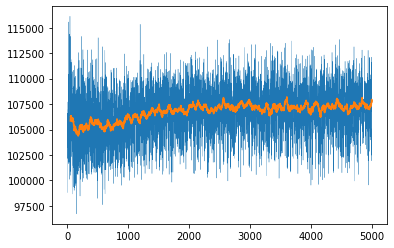

In [ ]:
#dibujo de las recompensas
plt.plot(episode_rewards, linewidth=0.3)
df=pd.DataFrame(episode_rewards)
df['MA'] = df.rolling(window=50).mean() 
plt.plot(df['MA'], linewidth=1.6)
print(episode_rewards[4999])

In [ ]:
state, reward, done = env.reset()
steps=0
step_reward=[0]*13
actions=[0]*13
while not done:
       # count steps to finish game
        steps+= 1
        action_probabilities = env.policyFunction(Otable,0)
        action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
        actions[steps]=action
        # take action
        if env.posX[1]>9:
          actionO=random.randrange(4,6,1)
        elif env.posX[1]>6:
          actionO=random.randrange(3,5,1)
        elif env.posX[1]>3:
          actionO=random.randrange(2,5,1)
        else:
          actionO=random.randrange(0,4,1)
        next_state, reward, done = env.step(action,actionO)
        env.posX=next_state
        
        # Update statistics 
        step_reward[steps] = reward 
        # update state
        state = next_state
episode_length = steps

print("\nDone in", steps, "steps".format(steps))
print(step_reward)
print(sum(step_reward))
a=dicactions.values()
b=list(a)
print(actions)


Done in 12 steps
[0, 10200, 9715, 9220, 8400, 9600, 8835, 8515, 9300, 7815, 7235, 7435, 8050]
104320
[0, 2, 4, 3, 3, 2, 2, 0, 0, 3, 0, 4, 0]


In [ ]:
#CREATE ENVIROMENT
import gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

dicactions={0:725,1:775,2:825,3:875,4:925,5:975}
n_piezas=210  #numero de piezas en stock
n_periodos=24 #numero de meses para vender las piezas
R1 = np.array([range(10,16),range(9,15),range(8,14),range(7,13),range(6,12),range(5,11)])
R2 = np.array([range(10,4,-1),range(11,5,-1),range(12,6,-1),range(13,7,-1),range(14,8,-1),range(15,9,-1)])

class Env2():
    def __init__(self):
        self.size = n_piezas+1;
        self.periods=n_periodos 
        self.posX = [n_piezas,n_piezas,n_periodos];
        self.endX = 0;
        self.actions = [0,1,2,3,4,5];
        self.stateCount = self.size;
        self.actionCount = len(self.actions);

    def reset(self):
        self.posX = [n_piezas,n_piezas,n_periodos];
        self.done = False;
        return [n_piezas,n_piezas,n_periodos],0,0, False;

    # take action
    def step(self,action1,action2):
        nextState = [self.posX[0]-R1[action1][action2],self.posX[1]-R2[action1][action2],self.posX[2]-1];
        
        done = nextState[2]==self.endX;
        
        reward = (dicactions[action1])*(self.posX[0]-nextState[0])-5*self.posX[0];
        reward2 = (dicactions[action2])*(self.posX[1]-nextState[1])-5*self.posX[1];
        
        return nextState, reward,reward2,done;

    # return a random action
    def randomAction(self):
        return np.random.choice(self.actions);
    
    def policyFunction(self,qtable,epsilon): 
        Action_probabilities = np.ones(self.actionCount, dtype = float) * epsilon / self.actionCount 
        best_action = np.argmax(qtable[self.posX[2]][self.posX[0]]) 
        Action_probabilities[best_action] += (1.0 - epsilon) 
        return Action_probabilities
    def policyFunction2(self,qtable,epsilon): 
        Action_probabilities = np.ones(self.actionCount, dtype = float) * epsilon / self.actionCount 
        best_action = np.argmax(qtable[self.posX[2]][self.posX[1]]) 
        Action_probabilities[best_action] += (1.0 - epsilon) 
        return Action_probabilities   

In [ ]:
# create environment
env = Env2()
qtable = np.zeros([n_periodos+1,env.stateCount, env.actionCount, env.actionCount]).tolist()
Otable = np.zeros([n_periodos+1,env.stateCount, env.actionCount]).tolist()
Ns = np.ones([n_periodos+1]).tolist()
Nsa = np.ones([n_periodos+1, env.actionCount]).tolist()
Otable2 = np.zeros([n_periodos+1,env.stateCount, env.actionCount]).tolist()
Ns2 = np.ones([n_periodos+1]).tolist()
Nsa2 = np.ones([n_periodos+1, env.actionCount]).tolist()
qtable2 = np.zeros([n_periodos+1,env.stateCount, env.actionCount, env.actionCount]).tolist()
# hyperparameters
epochs = 1000
#gamma = 0.1
epsilon = 0.8
decay = epsilon/epochs
#stats
episode_rewards=[0]*epochs
episode_rewards2=[0]*epochs
# training loop
for i in range(epochs):
    state, reward, reward2, done = env.reset()
    steps=0
    while not done:
        #os.system('clear')
        
        
        
        # count steps to finish game
        steps+= 1
        action_probabilities = env.policyFunction(Otable,epsilon)
        action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
        #oponent action
        action_probabilities2 = env.policyFunction2(Otable2,epsilon)
        actionO = np.random.choice(np.arange(len(action_probabilities2)), p = action_probabilities2) 
        # take action
        next_state, reward,reward2, done = env.step(action,actionO)
        env.posX=next_state
        
        # Update statistics 
        episode_rewards[i] += reward
        episode_rewards2[i] += reward2 
        # Update Otable
        X=list(map(lambda x: x / Ns[state[2]], Nsa[state[2]] ))
        Y=qtable[state[2]][state[0]][action]
        Otable[state[2]][state[0]][action]=sum(i[0] * i[1] for i in zip(X, Y))
        # Update Otable2
        X=list(map(lambda x: x / Ns2[state[2]], Nsa2[state[2]] ))
        Y=qtable2[state[2]][state[1]][actionO]
        Otable2[state[2]][state[1]][actionO]=sum(i[0] * i[1] for i in zip(X, Y))
        # update qtable value with Bellman equation
        qtable2[state[2]][state[1]][action][actionO] = reward +  max(Otable2[state[2]-1][next_state[1]])
        qtable[state[2]][state[0]][action][actionO] = reward2 +  max(Otable[state[2]-1][next_state[0]])
        # update N
        Nsa[state[2]][actionO]=Nsa[state[2]][actionO]+1
        Ns[state[2]]= Ns[state[2]]+1
        Nsa2[state[2]][action]=Nsa[state[2]][action]+1
        Ns2[state[2]]= Ns[state[2]]+1
        # update state
        state = next_state
        # The more we learn, the less we take random actions
        epsilon = epsilon-decay*epsilon
    print("epoch #", i+1, "/", epochs)

epoch # 1 / 1000
epoch # 2 / 1000
epoch # 3 / 1000
epoch # 4 / 1000
epoch # 5 / 1000
epoch # 6 / 1000
epoch # 7 / 1000
epoch # 8 / 1000
epoch # 9 / 1000
epoch # 10 / 1000
epoch # 11 / 1000
epoch # 12 / 1000
epoch # 13 / 1000
epoch # 14 / 1000
epoch # 15 / 1000
epoch # 16 / 1000
epoch # 17 / 1000
epoch # 18 / 1000
epoch # 19 / 1000
epoch # 20 / 1000
epoch # 21 / 1000
epoch # 22 / 1000
epoch # 23 / 1000
epoch # 24 / 1000
epoch # 25 / 1000
epoch # 26 / 1000
epoch # 27 / 1000
epoch # 28 / 1000
epoch # 29 / 1000
epoch # 30 / 1000
epoch # 31 / 1000
epoch # 32 / 1000
epoch # 33 / 1000
epoch # 34 / 1000
epoch # 35 / 1000
epoch # 36 / 1000
epoch # 37 / 1000
epoch # 38 / 1000
epoch # 39 / 1000
epoch # 40 / 1000
epoch # 41 / 1000
epoch # 42 / 1000
epoch # 43 / 1000
epoch # 44 / 1000
epoch # 45 / 1000
epoch # 46 / 1000
epoch # 47 / 1000
epoch # 48 / 1000
epoch # 49 / 1000
epoch # 50 / 1000
epoch # 51 / 1000
epoch # 52 / 1000
epoch # 53 / 1000
epoch # 54 / 1000
epoch # 55 / 1000
epoch # 56 / 1000
e

169310


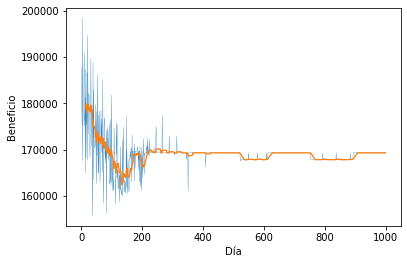

In [ ]:
#dibujo de las recompensas
plt.plot(episode_rewards, linewidth=0.3)
df=pd.DataFrame(episode_rewards)
df['MA'] = df.rolling(window=15).mean() 
plt.plot(df['MA'], linewidth=1.3)
plt.xlabel('Día')
plt.ylabel('Beneficio')
print(episode_rewards[epochs-1])

166690


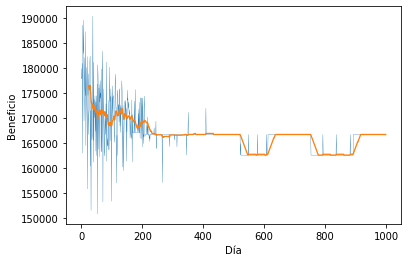

In [ ]:
#dibujo de las recompensas
plt.plot(episode_rewards2, linewidth=0.3)
df2=pd.DataFrame(episode_rewards2)
df2['MA'] = df2.rolling(window=25).mean() 
plt.plot(df2['MA'], linewidth=1.3)
plt.xlabel('Día')
plt.ylabel('Beneficio')
print(episode_rewards2[epochs-1])

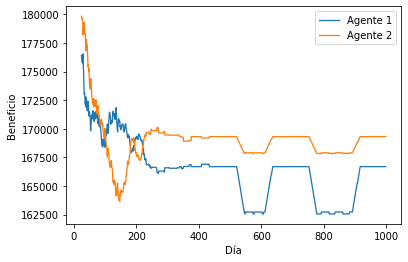

In [ ]:
plt.plot(df2['MA'], linewidth=1.3,label='Agente 1')
plt.plot(df['MA'], linewidth=1.3,label='Agente 2')
plt.xlabel('Día')
plt.ylabel('Beneficio')
plt.legend()

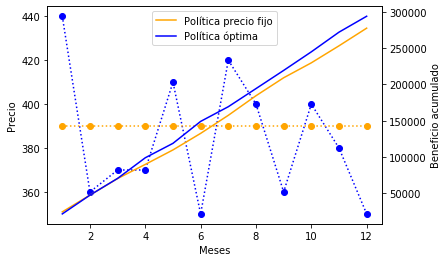

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

mes=[1,2,3,4,5,6,7,8,9,10,11,12]
precios=[dicactions[8],dicactions[8],dicactions[8],dicactions[8],dicactions[8],dicactions[8],dicactions[8],dicactions[8],dicactions[8],dicactions[10],dicactions[10],dicactions[10]]
ventas=[20,20,20,20,200,20,20,20,20,20,20,20]
beneficios=[7800,7845,7890,7935,7980,8025,8070,8115,8160,7680,7720,7760]
precios2=[370,380,410,400,370,390,400,380,420,380,380,360]
demanda2=[75,69,56,60,75,65,60,69,52,69,69,80]
precios31=[340,350,340,375,340,380,340,360,340,340,340,360]
precios32=[340,405,360,340,350,340,420,340,350,340,340,340]
precios33=[420,400,390,340,390,340,380,360,340,340,340,340]
precios34=[340,340,420,350,340,360,405,340,350,340,340,340]
preciosEJ=[440,360,370,370,410,350,420,400,360,400,380,350]
preciosEJ2=[390,390,390,390,390,390,390,390,390,390,390,390]
beneficio=[21720,47586,70664,99054,118914,149116,169346,194276,219294,244894,271984,293908]
beneficio2=[24530,47634,70472,89906,109838,132622,157480,184446,209194,229760,253178,277502]
#plt.plot(mes,precios31,'o-',label='Q-Learning')
#plt.plot(mes,precios32,'o-',label='SARSA')
#plt.plot(mes,precios33,'o-')
#plt.plot(mes,precios34,'o-',label='Exp.SARSA')
#plt.plot(mes,ventas,'o-')
#plt.plot(x2,demand2(x2))
#plt.axis([0, 13, 330, 430])
#plt.xlabel('Mes')
#plt.ylabel('Precio')
#plt.legend(loc='upper right', shadow=True, fontsize='x-large')
#plt.show()
# Plot 1
fig, ax = plt.subplots()

ax.plot(mes, preciosEJ,':o',label='Política óptima',color='blue')
ax.plot(mes, preciosEJ2,':o',label='Precio fijo',color='orange')
ax2 = ax.twinx()
ax2.plot(mes, beneficio2,'-', color='orange',label='Política precio fijo')
ax2.plot(mes, beneficio,'-', color='blue',label='Política óptima')
#ax2.yaxis.grid(which="major", color='green', linestyle='--')
#ax.axis([0, 13, 890, 1000])
#ax2.axis([0, 13, 5700, 8350])
#ax.legend(loc='upper center')
ax2.legend(loc='upper center')
ax.set_xlabel('Meses')
ax.set_ylabel('Precio')
ax2.set_ylabel('Beneficio acumulado')
plt.show()

In [ ]:
a=list(np.diff(beneficio))
a.insert(0,21720)
print(a)
b=list(np.diff(beneficio2))
b.insert(0,24530)
print(b)

[21720, 25866, 23078, 28390, 19860, 30202, 20230, 24930, 25018, 25600, 27090, 21924]
[24530, 23104, 22838, 19434, 19932, 22784, 24858, 26966, 24748, 20566, 23418, 24324]


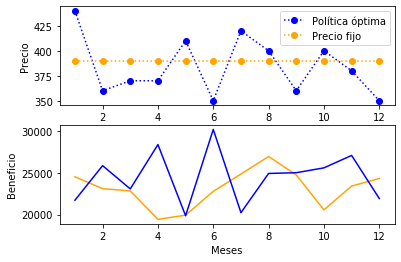

In [ ]:
fig, ax = plt.subplots(2)

ax[0].plot(mes, preciosEJ,':o',label='Política óptima',color='blue')
ax[0].plot(mes, preciosEJ2,':o',label='Precio fijo',color='orange')
#ax2 = ax.twinx()
ax[1].plot(mes, b,'-', color='orange',label='Beneficio')
ax[1].plot(mes, a,'-', color='blue',label='Beneficio')
#ax2.yaxis.grid(which="major", color='green', linestyle='--')
#ax.axis([0, 13, 890, 1000])
#ax2.axis([0, 13, 5700, 8350])
ax[0].legend(loc='upper right')
#ax[1].legend(loc='lower right')
ax[0].set_ylabel('Precio')
ax[1].set_ylabel('Beneficio')
ax[1].set_xlabel('Meses')
plt.show()